In [1]:
# !pip install -q --upgrade accelerate einops xformers

In [2]:
import numpy as np
import random
import os
import tensorflow as tf
from transformers import set_seed
import datasets

rand_seed = 9

def seed_everything(seed=0):
    random.seed(seed) # random
    os.environ['PYTHONHASHSEED'] = str(seed) # python enviroment
    np.random.seed(seed) # numpy
    tf.random.set_seed(seed) # tensorflow
    set_seed(seed) # hugging_face transformer

seed_everything(rand_seed)

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

# Loading Model and Tokenizer

In [3]:
from transformers import AutoConfig
from transformers import BertTokenizerFast
from transformers import TFAutoModelForSequenceClassification, PreTrainedTokenizerFast

print("Loading Model")
i = 3
model_id = ['raygx/distilBERT-Nepali','Shushant/nepaliBERT','NepBERTa/NepBERTa',"raygx/NepaliLM-BERT"][1]

print("Intialization: Pretrained {}".format(model_id))

try:
    tokenizer = PreTrainedTokenizerFast.from_pretrained(model_id)
except:
    tokenizer = BertTokenizerFast.from_pretrained(model_id)

try:
    model = TFAutoModelForSequenceClassification.from_pretrained(model_id,
            id2label={0:"NEUTRAL",1:"POSITIVE",2:"NEGATIVE"},
            label2id={"NEUTRAL":0,"POSITIVE":1,"NEGATIVE":2},ignore_mismatched_sizes=True)
except Exception as e:
    print(e)
    model = TFAutoModelForSequenceClassification.from_pretrained(model_id,
            id2label={0:"NEUTRAL",1:"POSITIVE",2:"NEGATIVE"},
            label2id={"NEUTRAL":0,"POSITIVE":1,"NEGATIVE":2}, from_pt=True,ignore_mismatched_sizes=True)
model.resize_token_embeddings(len(tokenizer))

Loading Model
Intialization: Pretrained Shushant/nepaliBERT


Shushant/nepaliBERT does not appear to have a file named tf_model.h5 but there is a file for PyTorch weights. Use `from_pt=True` to load this model from those weights.


Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertForSequenceClassification: ['bert.embeddings.position_ids']
- This IS expected if you are initializing TFBertForSequenceClassification from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertForSequenceClassification from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['bert.pooler.dense.weight', 'bert.pooler.dense.bias', 'classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


<tf.Variable 'tf_bert_for_sequence_classification/bert/embeddings/word_embeddings/weight:0' shape=(30522, 768) dtype=float32, numpy=
array([[-1.0126330e-02,  6.0940760e-01, -1.2932321e-02, ...,
        -4.0139150e-02, -3.8403878e-01, -1.5108096e-02],
       [ 1.6540168e-02,  5.3137284e-02, -7.6477025e-03, ...,
         2.9101238e-02, -7.0671774e-02,  4.2947892e-02],
       [ 7.9220347e-03,  1.0469845e-01,  3.1660851e-02, ...,
         3.2496277e-02, -4.0235545e-02, -4.1500717e-02],
       ...,
       [ 1.4784136e-02,  2.4127005e-01,  6.6819601e-03, ...,
         1.9043359e-04, -2.3841731e-01, -2.8261753e-02],
       [ 6.4263128e-02,  2.5852656e-01,  3.3777559e-03, ...,
        -1.1481761e-02, -2.8464749e-01,  2.9687393e-02],
       [-2.9865343e-03,  2.5343245e-01,  2.3266962e-02, ...,
         1.4173536e-02, -2.7037045e-01, -4.7388423e-02]], dtype=float32)>

In [4]:
print(model.config)
print(model.summary())

BertConfig {
  "_name_or_path": "Shushant/nepaliBERT",
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "id2label": {
    "0": "NEUTRAL",
    "1": "POSITIVE",
    "2": "NEGATIVE"
  },
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "label2id": {
    "NEGATIVE": 2,
    "NEUTRAL": 0,
    "POSITIVE": 1
  },
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "torch_dtype": "float32",
  "transformers_version": "4.30.1",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 30522
}

Model: "tf_bert_for_sequence_classification"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bert (TFBertMainLayer

In [5]:
from transformers import create_optimizer, AdamWeightDecay

optimizer = AdamWeightDecay(learning_rate=2e-5, weight_decay_rate=0.05)
model.compile(optimizer=optimizer)

# Data Loading and Preparation

In [6]:
if False:
    print("#######################Using NepCov19Tweets#########################")
    data = datasets.load_dataset("raygx/NepCov19Tweets")
elif True:
    print("#######################Using NepCov19Tweets + NepQuake15Tweets aka NepaliTweets#########################")
    data = datasets.load_dataset("raygx/NepaliTweets")
else:
    print("####################Using NepCov19TweetsPlus########################")
    data = datasets.load_dataset("raygx/NepCov19TweetsPlus")

data = data.rename_columns({"Sentiment":"label","Sentences":"text"})
data

#######################Using NepCov19Tweets + NepQuake15Tweets aka NepaliTweets#########################


Extracting data files:   0%|          | 0/1 [00:00<?, ?it/s]

Dataset parquet downloaded and prepared to /root/.cache/huggingface/datasets/parquet/raygx--NepaliTweets-9025e82b7dd8a3bf/0.0.0/0b6d5799bb726b24ad7fc7be720c170d8e497f575d02d47537de9a5bac074901. Subsequent calls will reuse this data.


  0%|          | 0/1 [00:00<?, ?it/s]

DatasetDict({
    train: Dataset({
        features: ['label', 'text'],
        num_rows: 44269
    })
})

In [7]:
# ### Data combination
# ar_d = datasets.load_dataset("raygx/CORONA_arabic2np")
# en_d = datasets.load_dataset("raygx/CORONA_en2np")
# en_d = en_d.rename_columns({"Sentiment":"label","Sentences":"text"})

# print(ar_d,en_d)
# data['train'] = datasets.concatenate_datasets([data['train'],ar_d['train'],en_d['train']])

In [8]:
data = data.shuffle(rand_seed)
data = data['train'].train_test_split(test_size=0.2)
data

DatasetDict({
    train: Dataset({
        features: ['label', 'text'],
        num_rows: 35415
    })
    test: Dataset({
        features: ['label', 'text'],
        num_rows: 8854
    })
})

In [9]:
def LabelEncoding(x):
    if x['label']==0:
        x['label'] = 0#[1,0,0]
    if x['label']==1:
        x['label'] =  1#[0,1,0]
    if x['label']==-1:
        x['label'] =  2#[0,0,1]

    return x

data = data.map(
        LabelEncoding,
        num_proc=4)

print(data)

#0:   0%|          | 0/8854 [00:00<?, ?ex/s]

#1:   0%|          | 0/8854 [00:00<?, ?ex/s]

#2:   0%|          | 0/8854 [00:00<?, ?ex/s]

#3:   0%|          | 0/8853 [00:00<?, ?ex/s]

#0:   0%|          | 0/2214 [00:00<?, ?ex/s]

#1:   0%|          | 0/2214 [00:00<?, ?ex/s]

#2:   0%|          | 0/2213 [00:00<?, ?ex/s]

#3:   0%|          | 0/2213 [00:00<?, ?ex/s]

DatasetDict({
    train: Dataset({
        features: ['label', 'text'],
        num_rows: 35415
    })
    test: Dataset({
        features: ['label', 'text'],
        num_rows: 8854
    })
})


In [10]:
data['train'].filter(lambda x: x['label']==0), data['train'].filter(lambda x: x['label']==1), data['train'].filter(lambda x: x['label']==2)

  0%|          | 0/36 [00:00<?, ?ba/s]

  0%|          | 0/36 [00:00<?, ?ba/s]

  0%|          | 0/36 [00:00<?, ?ba/s]

(Dataset({
     features: ['label', 'text'],
     num_rows: 11225
 }),
 Dataset({
     features: ['label', 'text'],
     num_rows: 12515
 }),
 Dataset({
     features: ['label', 'text'],
     num_rows: 11675
 }))

In [11]:
%%time

def preprocess_function(rows):
    return tokenizer(rows['text'],truncation=True)

print("Tokenizing the data")
tokenized_inputs = data.map(
    preprocess_function,
    batched=True,
    num_proc=4,
    remove_columns=data["train"].column_names,
)
# tokenized_inputs = tokenized_inputs.remove_columns(['token_type_ids'])

tokenized_inputs['train'] = tokenized_inputs['train'].add_column(
    name="label",column=data['train']['label']
)
tokenized_inputs['test'] = tokenized_inputs['test'].add_column(
    name="label",column=data['test']['label']
)

tokenized_inputs

Tokenizing the data
       

#0:   0%|          | 0/9 [00:00<?, ?ba/s]

#1:   0%|          | 0/9 [00:00<?, ?ba/s]

Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


#2:   0%|          | 0/9 [00:00<?, ?ba/s]

#3:   0%|          | 0/9 [00:00<?, ?ba/s]

Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.
Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.
Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


#0:   0%|          | 0/3 [00:00<?, ?ba/s]

Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


#1:   0%|          | 0/3 [00:00<?, ?ba/s]

Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


#2:   0%|          | 0/3 [00:00<?, ?ba/s]

#3:   0%|          | 0/3 [00:00<?, ?ba/s]

Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.
Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


CPU times: user 604 ms, sys: 337 ms, total: 941 ms
Wall time: 9.17 s


DatasetDict({
    train: Dataset({
        features: ['input_ids', 'token_type_ids', 'attention_mask', 'label'],
        num_rows: 35415
    })
    test: Dataset({
        features: ['input_ids', 'token_type_ids', 'attention_mask', 'label'],
        num_rows: 8854
    })
})

In [12]:
print(data['train'][:1])
print(tokenized_inputs['train'][:1]['input_ids'])
print(tokenizer.batch_decode(tokenized_inputs['train'][:1]['input_ids']))

{'label': [2], 'text': ['कोरोना भाइरस कोभिड बारे तपाईंको मनमा लागेका प्रश्न र उत्तर']}
[[2, 11959, 27189, 1005, 14865, 1805, 1842, 1051, 2588, 7412, 6025, 1737, 1677, 1996, 3637, 394, 29722, 8936, 4]]
['[CLS] कोरोना भाइरस कोभिड बार तपाईको मनमा लागका परशन र उततर [SEP]']


In [13]:
from transformers import DataCollatorWithPadding

print("Initializing Data Collator")
data_collator = DataCollatorWithPadding(tokenizer=tokenizer,
                                        max_length=128,
                                        return_tensors="tf")

Initializing Data Collator


In [14]:
print("Preparing Training and Testing sets to TRAIN the MODEL")
tf_train_set = model.prepare_tf_dataset(
    tokenized_inputs["train"],
    shuffle=True,
    batch_size=16,
    collate_fn=data_collator,
)

tf_test_set = model.prepare_tf_dataset(
    tokenized_inputs["test"],
    shuffle=False,
    batch_size=16,
    collate_fn=data_collator,
)

You're using a BertTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


Preparing Training and Testing sets to TRAIN the MODEL


/opt/conda/lib/python3.10/site-packages/transformers/tokenization_utils_base.py:2395: UserWarning: `max_length` is ignored when `padding`=`True` and there is no truncation strategy. To pad to max length, use `padding='max_length'`.
  warnings.warn(


# Training and Evaluation
## Training Section

In [15]:
%%time
n_epoch = 1

print("Training the model")
history = model.fit(x=tf_train_set,
          validation_data=tf_test_set,
          epochs=n_epoch)
print(history.history)

Training the model
2213/2213 [==============================] - 479s 206ms/step - loss: 0.5854 - val_loss: 0.5176
{'loss': [0.585361123085022], 'val_loss': [0.5175802707672119]}
CPU times: user 6min 44s, sys: 33.7 s, total: 7min 18s
Wall time: 8min 44s


<Axes: >

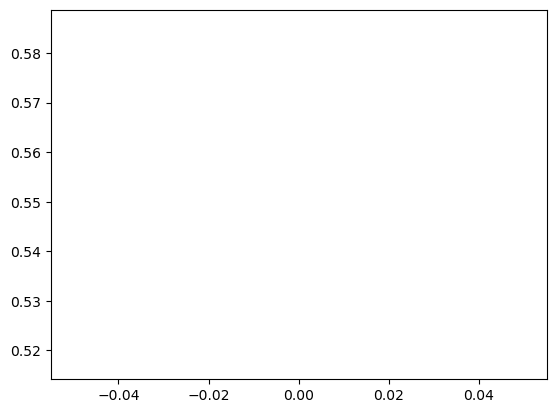

In [16]:
import seaborn

seaborn.lineplot(history.history['loss'])
seaborn.lineplot(history.history['val_loss'])

## Evaluation Section

In [17]:
%%time
from tqdm.auto import tqdm

print("Getting Test Prediction")
prediction = model.predict(tf_test_set)
pred_labels = [np.argmax(x) for x in prediction[0]]

actual_labels = data['test']['label']

Getting Test Prediction
  2/554 [..............................] - ETA: 39s  

/opt/conda/lib/python3.10/site-packages/transformers/tokenization_utils_base.py:2395: UserWarning: `max_length` is ignored when `padding`=`True` and there is no truncation strategy. To pad to max length, use `padding='max_length'`.
  warnings.warn(


554/554 [==============================] - 43s 72ms/step
CPU times: user 28 s, sys: 3.03 s, total: 31.1 s
Wall time: 44 s


**Computing F1-Score, Precision, Recall and Accuracy of the Model**

In [18]:
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score

print("F1-Score",f1_score(actual_labels,pred_labels,average='weighted'))
print("Precision-Score",precision_score(actual_labels,pred_labels,average='weighted'))
print("Recall-Score",recall_score(actual_labels,pred_labels,average='weighted'))
print("accuracy_Score",accuracy_score(actual_labels,pred_labels))

F1-Score 0.7860457552883545
Precision-Score 0.7892068857924945
Recall-Score 0.785746555229275
accuracy_Score 0.785746555229275


**Plotting Confusion Matrix**

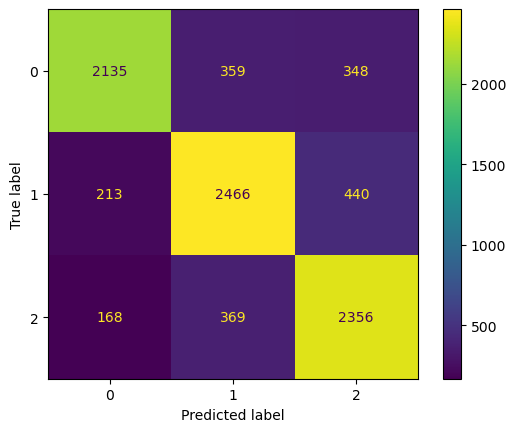

In [19]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cmd = ConfusionMatrixDisplay(tf.math.confusion_matrix(actual_labels,pred_labels,num_classes=3).numpy())
cmd.plot()